<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/Project%207%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
 - Identify outliers and quantify them columns that contain outliers
>- 5) EDA
>- 6) Transform data if needed
>- 7) Build ANN for classification 
    - 
    - 
    - 
>- 8) Tune ANN according to ROC-AUC curve
    - 
    - 
    -  
>- 9) compare and contrastS
>- 10) Conclusion and business insight. 


### Import libraries needed

In [ ]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 49 kB/s 
     |████████████████████████████████| 50 kB 9.1 MB/s 
     |████████████████████████████████| 3.8 MB 63.0 MB/s 
     |████████████████████████████████| 449 kB 79.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6640deca4ff550e92fbfa2d725ba66cce439d7dc8d5d6aa82599a9b248c311ee
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

# import function

%matplotlib inline
import seaborn as sns


# import scaling 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# neural network libraries
import tensorflow as tf
from tensorflow import keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense       # importing Dense layer

# import libraries for distance calculations within clusters 
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform kmeans clustering, and computing silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# import sklearn.metrics

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)


from google.colab import files
import io


# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

data.shape

### Data Dict
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [ ]:
data.shape

(10000, 14)

### Shape of the data
- The data has 10k rows and 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Insights 

- Balance has a slight disparity from mean and median values
- HAsCrCard has a slight disparity from the mean and median values

In [ ]:
# check for sum of null values

data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# define cat_ cols and numerical columns for EDA 


In [ ]:
# drop the  Sl_no and customer key column as this will add no value to the cluster analysis
#data = data.drop(["Sl_No","Customer Key"], axis = 1)
#data.describe()

In [ ]:
# insights for the descriptive stats: Avg Credit card and total visits online appear to have outliers
#  - This is due to the fact that the median and mean values are quite different. In credit limit there's 
# a diff. of approx 18,000 and with total visits_online there is a smaller differnece.  

### 5) - Bivariate Analyis
- pairplot
- correlation

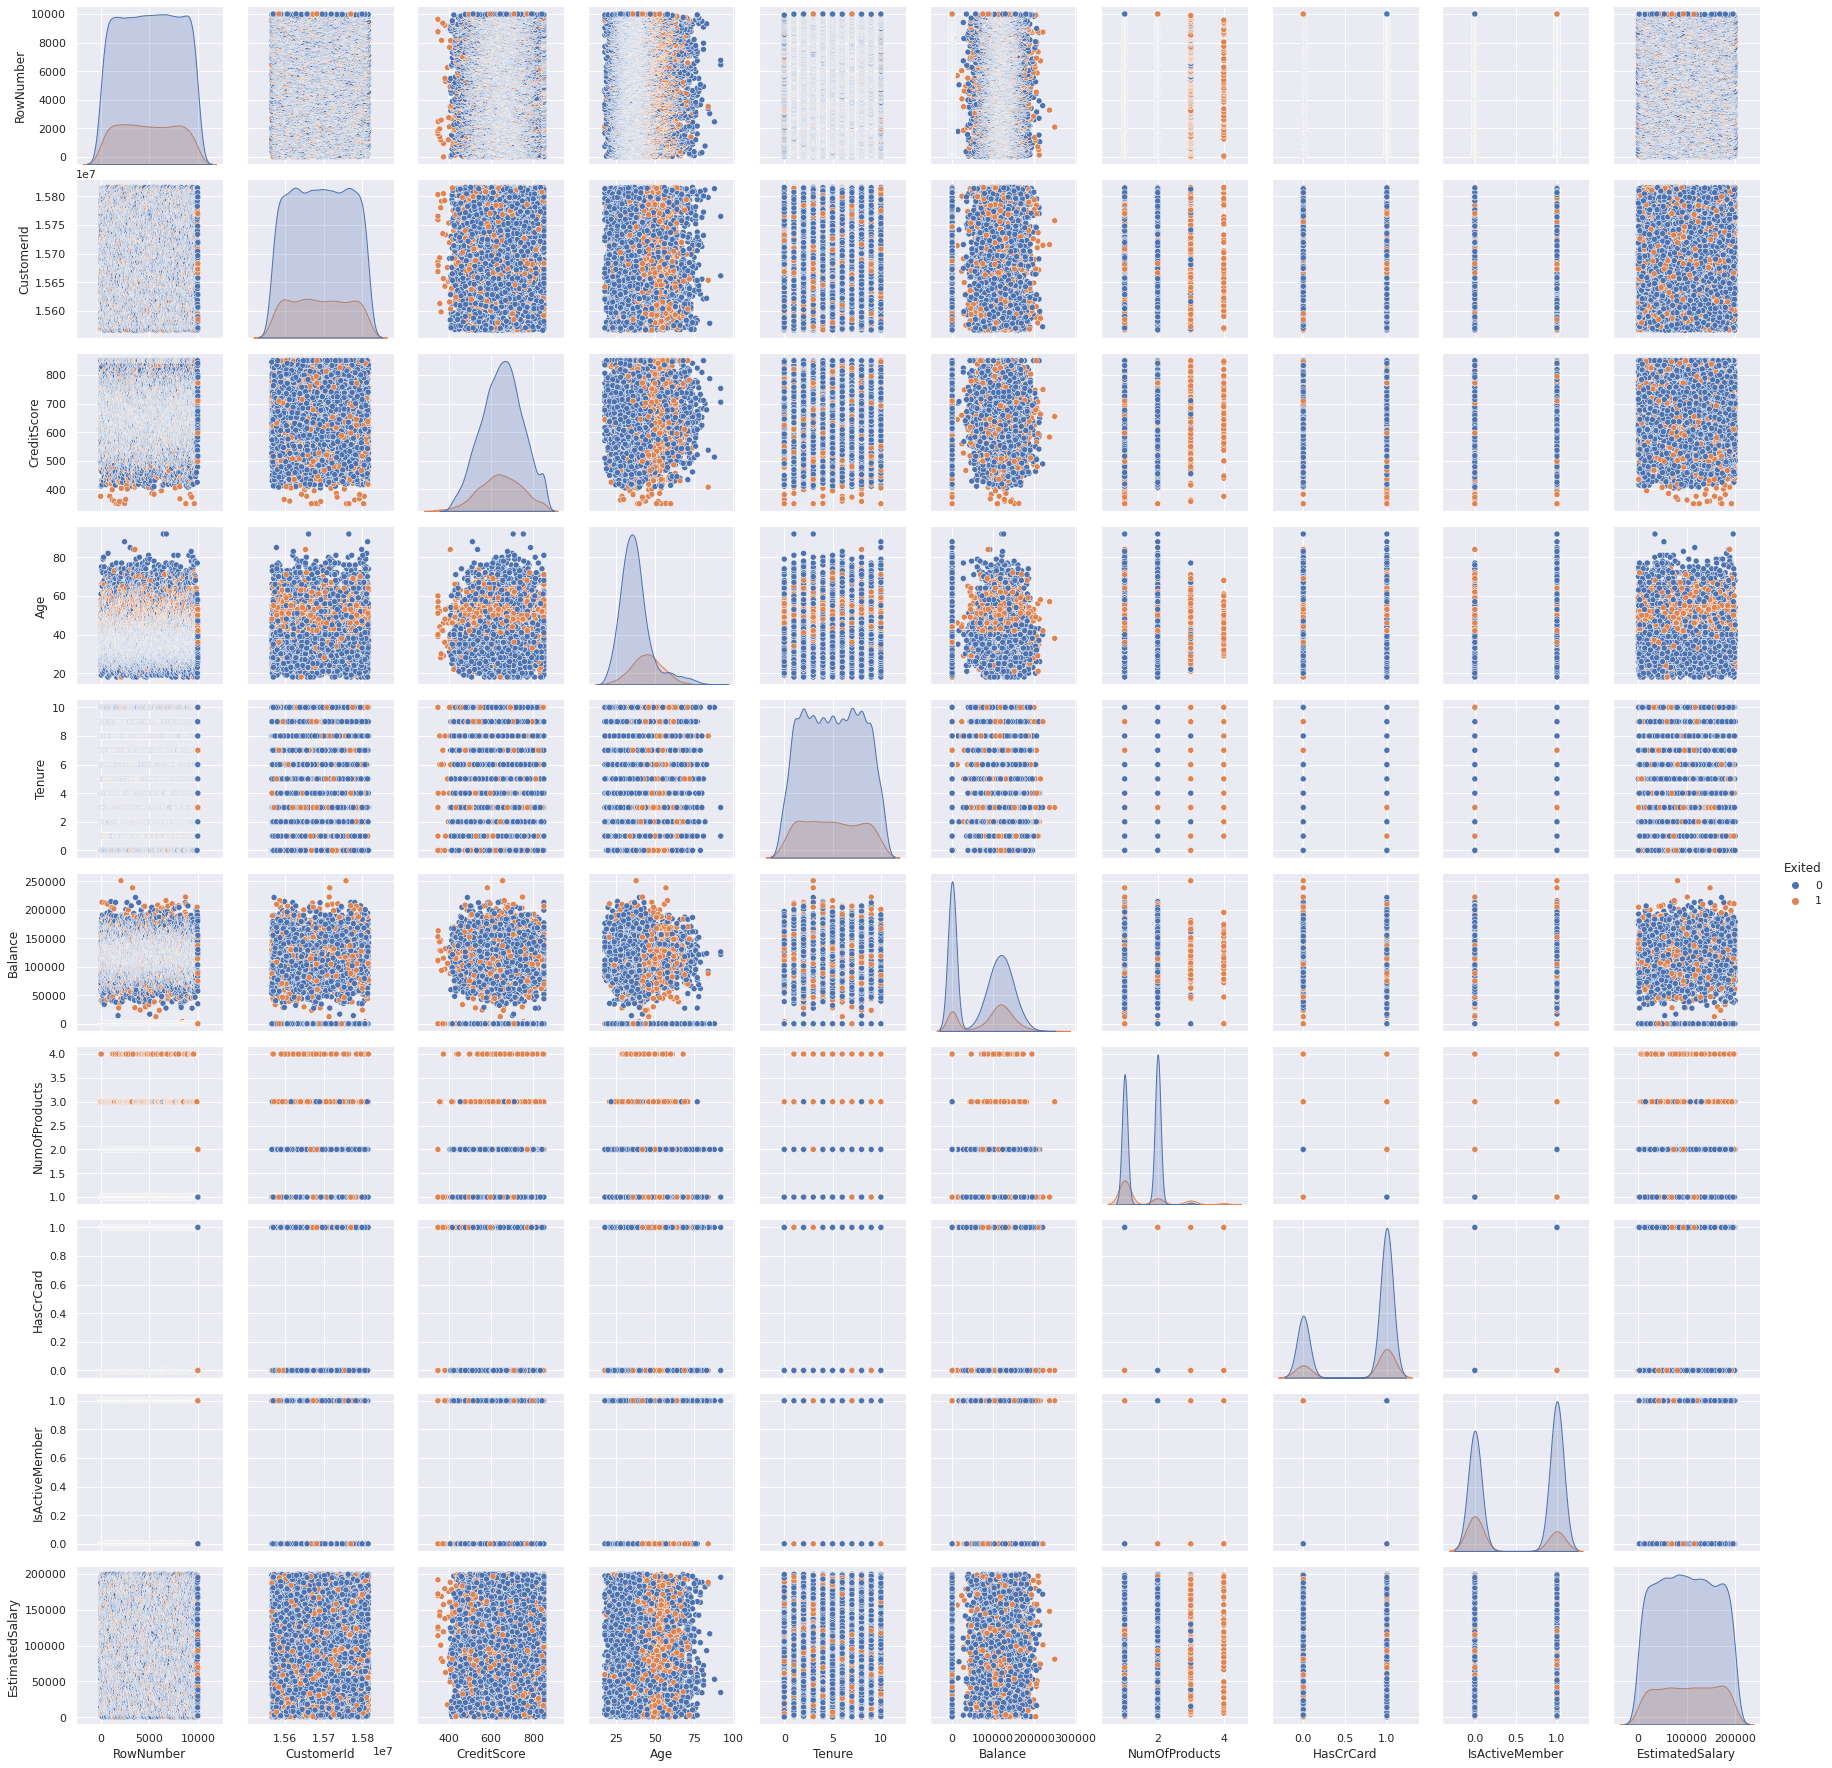

In [ ]:
sns.pairplot(data,diag_kind = 'kde', hue = "Exited")

In [ ]:
# correlation for continous variables
cat_list = ["NumOfProducts","HasCrCard","IsActiveMember","Tenure"]
num_col = data.columns.drop(cat_list)
num_col

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

In [ ]:
corr_df = pd.DataFrame(data= tmp_data,index=tmp_data.index, columns =numeric_col)
corr_df = corr_df.corr()

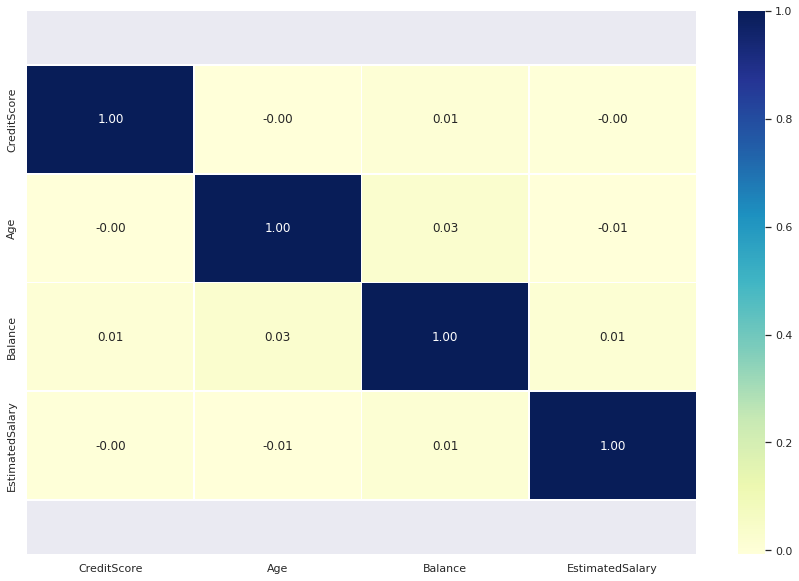

In [ ]:
make_corr_matrix(corr_df)

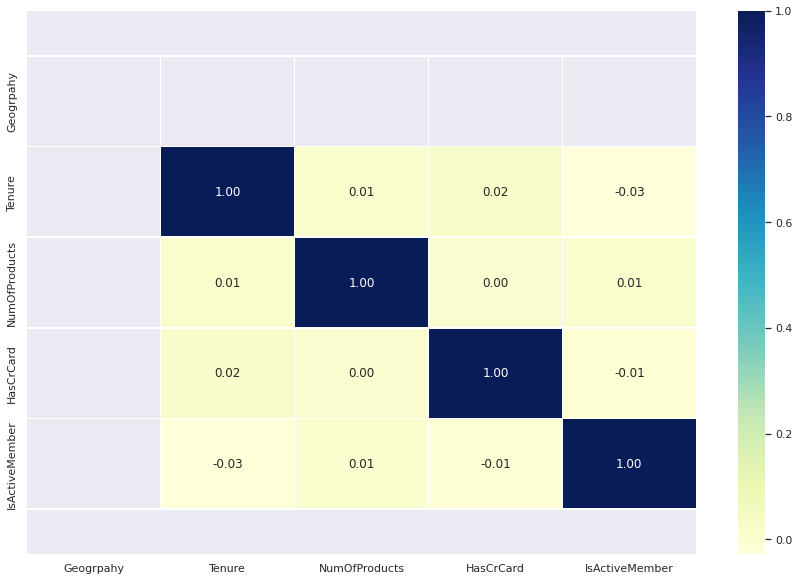

In [ ]:
# let's check the categorical columns 

cat_corr_df = pd.DataFrame(data= tmp_data,index=tmp_data.index, columns =["Geogrpahy","Gender","Tenure","NumOfProducts","HasCrCard"
,"IsActiveMember"])
cat_corr_df = cat_corr_df.corr()
make_corr_matrix(cat_corr_df)

In [ ]:
tmp_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# load bivariate functions

# edafunctions
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """


    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram




In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    
    """
    box plot and histogram combined

    data: dataframe
    feature: dataframe column
    target: target classification colummn
  
    """
    
    
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (with flier removed) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",
    )

    plt.tight_layout()
    plt.show()
# define column list of tmp_data 

In [ ]:
num_col

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
numeric_col =[  'CreditScore', 
        'Age', 'Balance', 'EstimatedSalary']

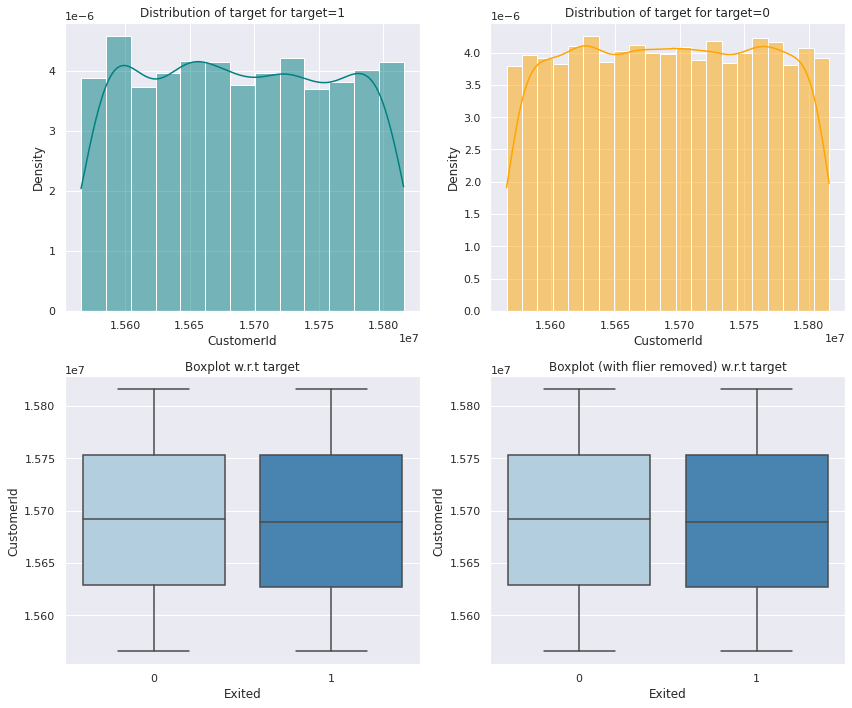

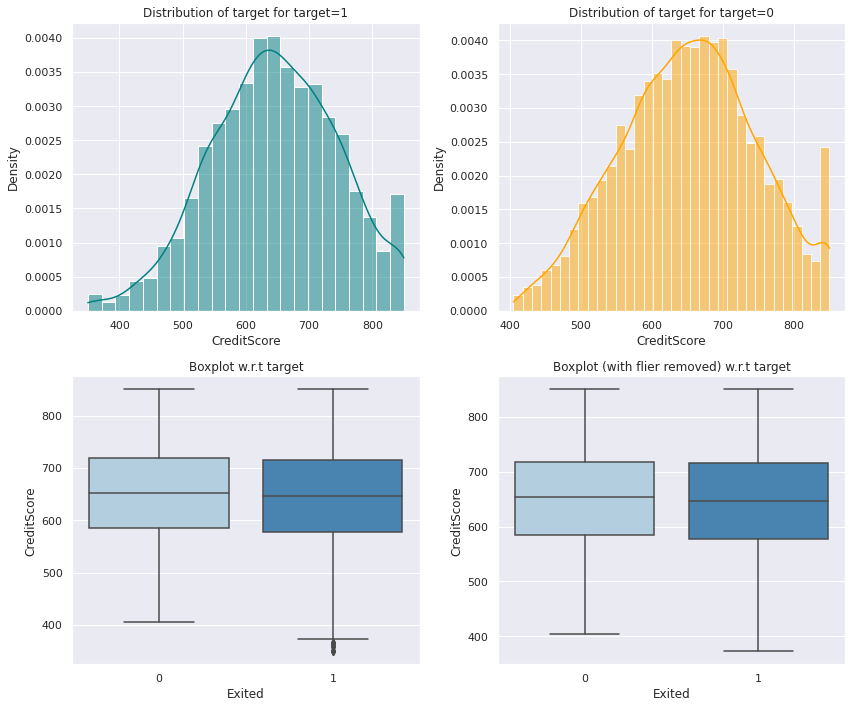

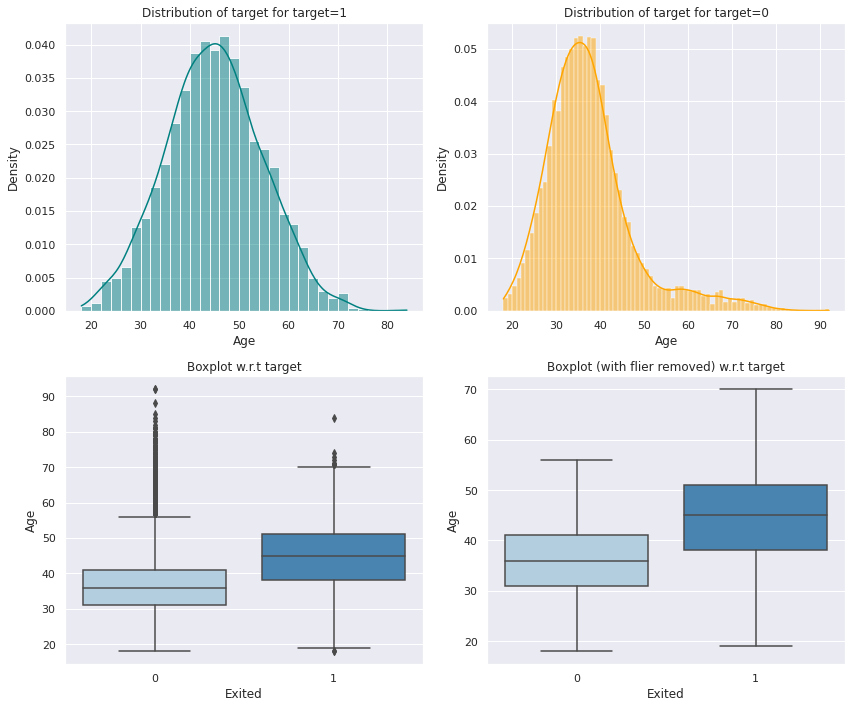

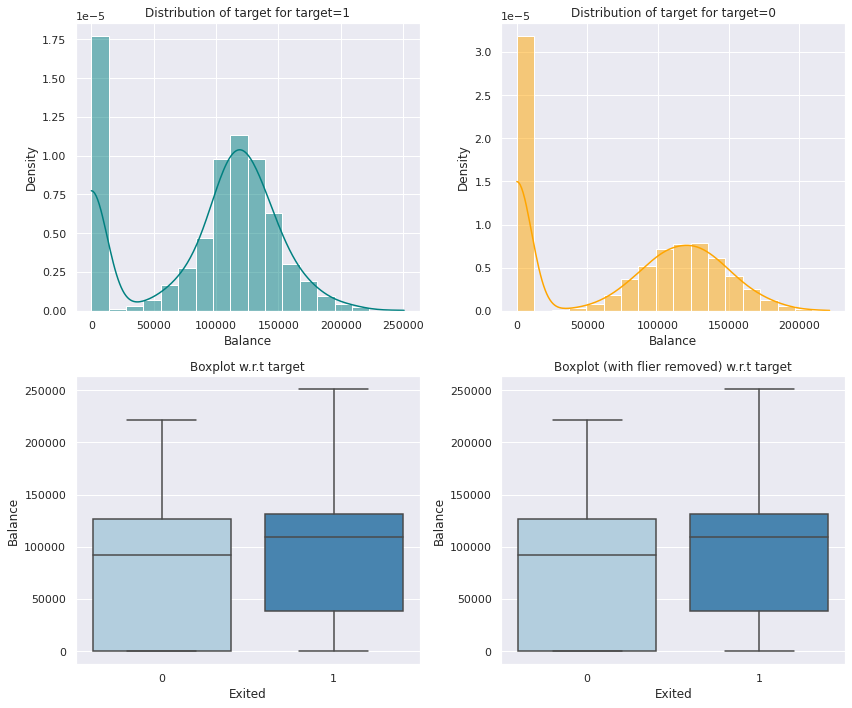

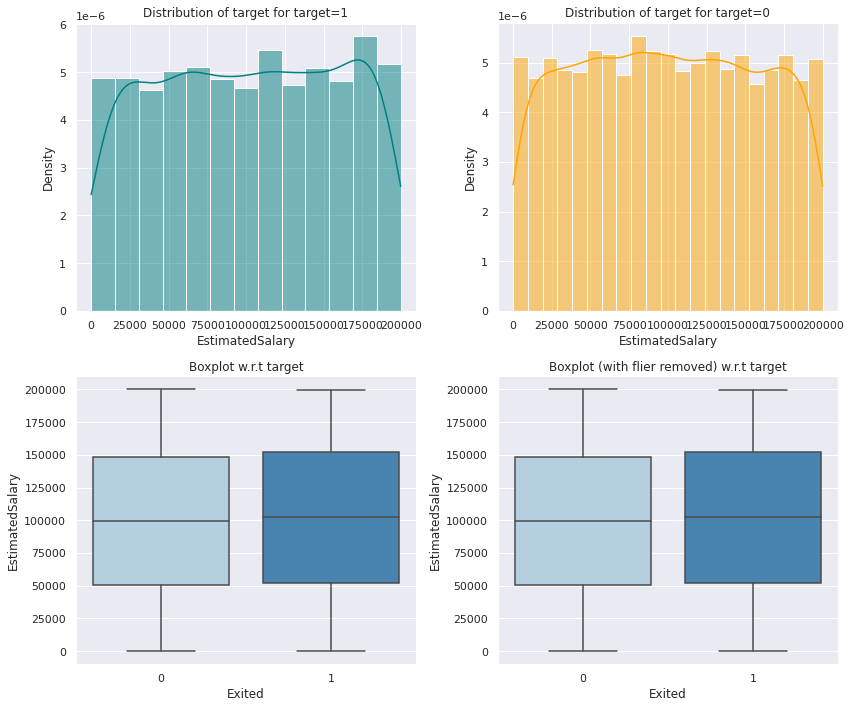

In [ ]:


for col in numeric_col:
  distribution_plot_wrt_target(tmp_data,col,"Exited")
       
        

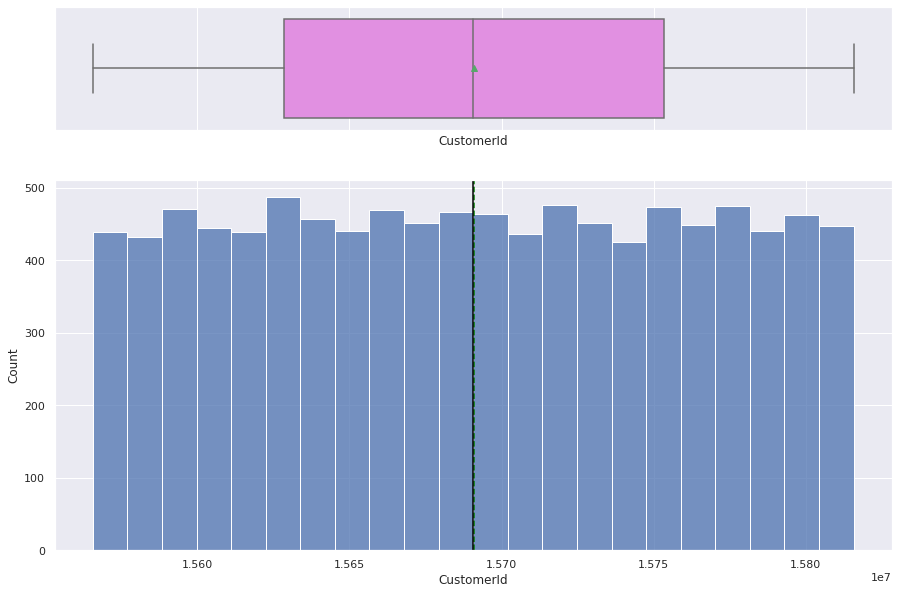

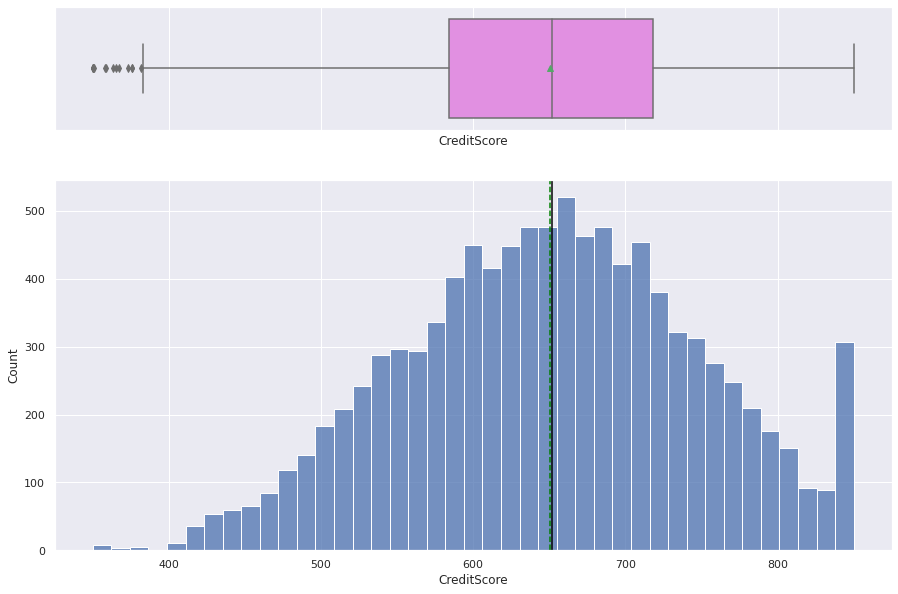

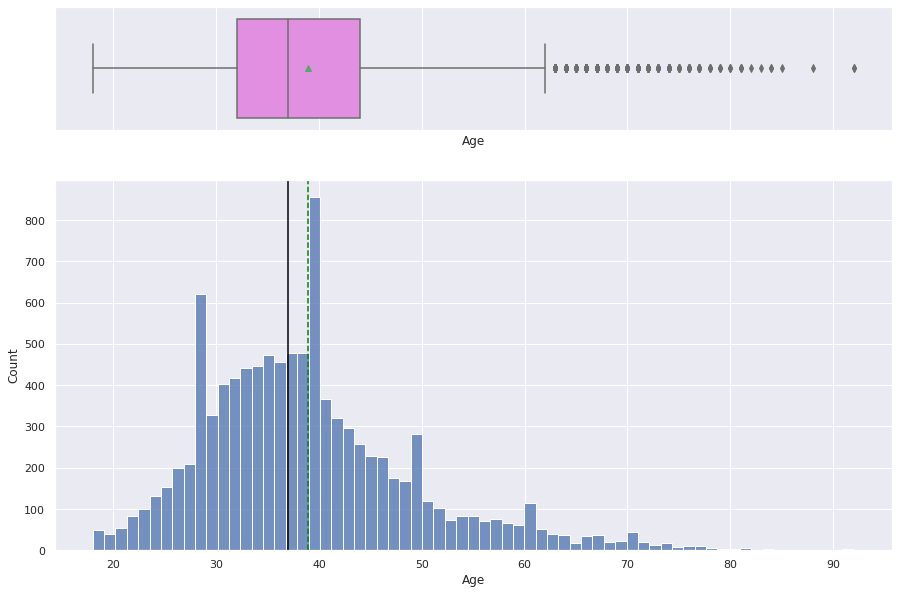

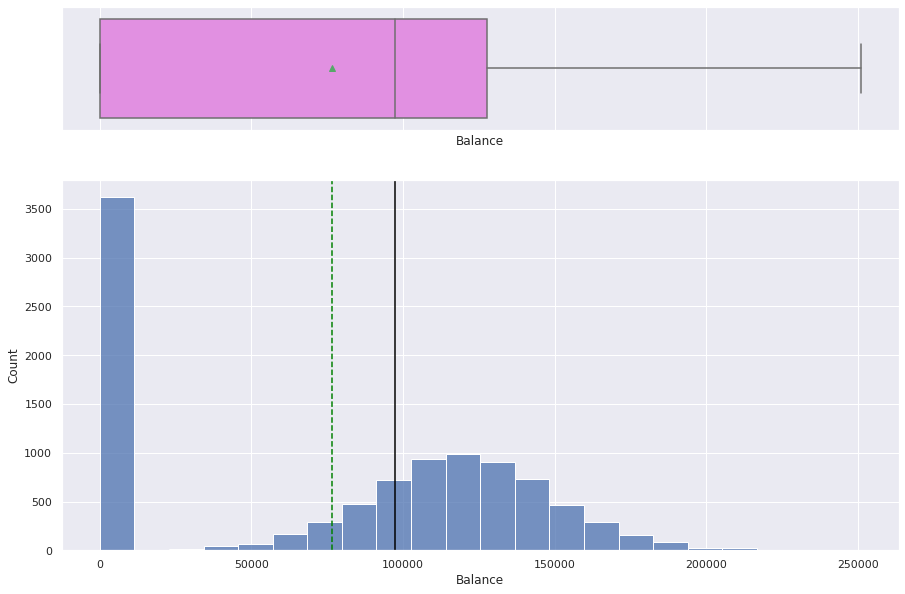

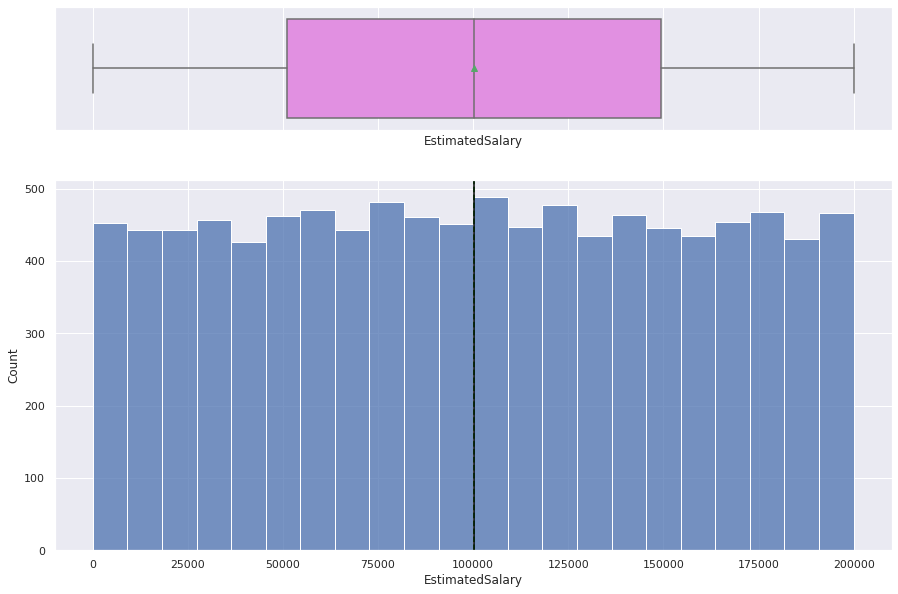

In [ ]:
for col in numeric_col:
  histogram_boxplot(tmp_data, col)

### Insights on pairplot.
- 

In [ ]:
# Bivariate Analysis

In [ ]:
# make copies of original dataset to remove and not remove outliers

out_data = data.copy()
tmp_data = data.copy()

In [ ]:
# identify outliers 
# use IQR to identify outliers. calculate 1st and 2nd quartile, then identify data points that are outside
# of the 4 * IQR range
balance_quartiles =np.quantile(out_data['Balance'][out_data['Balance'].notnull()], [.25, .75])
balance_quartiles_iqr = 4 * (balance_quartiles[1] - balance_quartiles[0])
Products_quartiles =np.quantile(out_data['NumOfProducts'][out_data['NumOfProducts'].notnull()], [.25, .75])
Products_quartiles_iqr = 4 * (Products_quartiles[1] - Products_quartiles[0])
# define the outlier

balance_outlier = out_data.loc[np.abs(out_data["Balance"]-out_data["Balance"].median()) > balance_quartiles_iqr, "Balance"]
product_outlier = out_data.loc[np.abs(out_data["NumOfProducts"]-out_data["NumOfProducts"].median()) > Products_quartiles_iqr, "NumOfProducts"]
len(balance_outlier)+len(product_outlier)


### outlier treatment 
- There are no outliers in this dataset

In [ ]:
tmp_data.shape

In [ ]:
#cat_list = list(tmp_data.columns)
#cat_list.remove("Avg_Credit_Limit")

In [ ]:
for col in cat_list:
    
    print(100*(data[col].isnull().sum()/len(data[col])))
    print(data[col].name)
    print("-"*60)

In [ ]:
cat_list = ["NumOfProducts","HasCrCard","IsActiveMember","Tenure"]

In [ ]:
# Preprocessing data 
# - Remove duplicate values

print("Before dropping of duplciates, data is",tmp_data.shape[0],"rows")
tmp_data.drop_duplicates(inplace=True)
print("after dropping of duplciates, data is",tmp_data.shape[0],"rows")

Before dropping of duplciates, data is 10000 rows
after dropping of duplciates, data is 10000 rows


In [ ]:
data.duplicated().sum()

0

In [ ]:
# get rid of useless rows which are 'RowNumber', 'CustomerId', 'Surname'

In [ ]:
tmp_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


KeyError: ignored

In [ ]:
tmp_data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
data["Geography"].value_counts(0)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
data_copy = data.copy()

In [ ]:
# use get dummies to encode values 
data_copy= pd.get_dummies(data_copy, columns = ["Geography","Gender"])
data_copy.head(5)

# drop the row #, Customer ID , and Surname

data_copy.drop(columns = ["RowNumber","CustomerID", "Surname"], axis = 1, inplace = True)
data_copy.head()

KeyError: ignored

In [ ]:
data_copy.drop(columns = ["RowNumber","CustomerId", "Surname"], axis = 1, inplace = True)
data_copy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
### 3) Univariate analysis

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
for feature in cat_list:
  if feature == "Total_visits_bank":
    print("#"*50)
    print("1 and 2 visits attribute to the most of the bank visits")
    print("#"*50)
  elif feature == "Total_Credit_Cards":
    print("#"*50)
    print("Customers with the 4,6,7 atttribute to the majority of the total credit cards", 
    "within the customers")
    print("#"*50)
  elif feature == "Total_visits_online":
    print("#"*50)
    print("0-2 visits online attribute to the majority of the online traffic", 
    "The customers don't really like going on the web")
    print("#"*50)
  elif feature == "Total_calls_made":
    print("#"*50)
    print("approx 70% of the customers fall within 0-4 calls made")
    print("#"*50)
  labeled_barplot(tmp_data, feature, perc=True)
  


In [ ]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"NumOfProducts")

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"HasCrCard")

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"IsActiveMember")

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Tenure")

In [ ]:
# Encode categorical variaBLES WITH  get dummies


#tmp_data = pd.get_dummies(tmp_data,drop_first=True)
data_copy = data_copy.astype('float32') # wdataset needs to be float to convert to tensors later
data_copy.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0


### 7) Build ANN mode for classification

- Define feature matrices x and y 
- Define train, test and val 
- scale data using scaler to standardize all data 
- Convert data into numpy vectors using .reshape
- Instantiate model
- Add input layer
- add hidden layers 
- add output layers

In [ ]:
# define feature matrices X and y 

X = data_copy.drop(columns="Exited")
Y = data_copy['Exited']

# splitting the data into train, test and val

#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [ ]:
# scale the data
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# convert data into numpy vectors
target_scaler = preprocessing.StandardScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1)) # Reshape your data using array.reshape(-1, 1) if your data has a single feature
y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
y_val=target_scaler.fit_transform(y_val.values.reshape(-1,1))

In [ ]:
# convert data into tensors

X_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
X_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)
X_val1=tf.convert_to_tensor(X_val)
y_val1=tf.convert_to_tensor(y_val)

*italicized text*

### insights

- more online visits to the bank imply less visits to the bank 
- more banks visits transpires to less credit cards owned
- as calls increase, so does the amount of visits online increase

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_calls_made")

### Insights

- As the number of credit cards increase, the total calls made decreases. 
- the highest number of calls are attributed from customers that have 0 - 2 visits to the bank.

In [ ]:

def histogram_boxplot(data, feature,hue, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: show kernel density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,hue=hue, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
for i in tmp_data.columns: 
  histogram_boxplot(tmp_data, i, hue = None)

In [ ]:
### Process the data 
# scale the data using zscore scaler by using the apply function

tmp_data_Scaled=tmp_data.apply(zscore)
# look at the pair plot to identify the different distributions within the data and the scatterplots
# from eeach possible relationship
sns.pairplot(tmp_data_Scaled,diag_kind='kde')

In [ ]:

# look at the correlation between each variable
df_corr_scaled = tmp_data_Scaled.corr()
df_corr = data.corr()
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

In [ ]:
make_corr_matrix(df_corr_scaled)

In [ ]:
make_corr_matrix(df_corr)

In [ ]:
# insights on correlation matrix: 
# total visits online vs Avg _credit limit show a positive relation 
# tota # of credit cards vs Avg_credit limit show a positive relation 
# - this makes sense for both relations as more visits online, translate to more credit
# - more credit card use.
# - As more customers visit online the average credit limit increases.

### insights 

- the average credit limit distribution appears to be right skewed.
- given the small amount of data, it is probably best not to remove any samples as we will be faced with overfitting if we get rid of too much of the data.
This will give us poor results in real world scenarios deploying the model. 

### Kmeans Cluster Analyis

In [ ]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# Use euclidean for distance calculation

# define a range for the number of clusters to iterate over
clusters = range(1,7)
# define an empty list for the mean distortions that will get calculated below 
euc_meanDistortions =[]

# iterate through the range for the number of clusters
for k in clusters: 

  # define the model
    euc_model = KMeans(n_clusters=k)

    euc_model.fit(tmp_data_Scaled)
  # fit the model on the scaled data 
    prediction=euc_model.predict(tmp_data_Scaled)
  # make predictions on the tmp scaled data after it has been fit
  euc_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,euc_model.cluster_centers_,"euclidean"),axis=1))/tmp_data_Scaled.shape[0])
    # use the two arrays tmp_data_scaled and euc_model.cluster_centers_ to calculate the distance between each pair of values
    # divide that by the number of rows in the tmp_data_Scaled df
    # then take the sum of the minumum distance computed then append that in the mean_dist list
    
plt.plot(clusters, euc_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

In [ ]:
euc_model.labels_

In [ ]:
euc_model.cluster_centers_

In [ ]:
euc_meanDistortions

In [ ]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# use "minkowski" for ditance calculation

clusters = range(1,7)
mink_meanDistortions =[]

for k in clusters: 
    mink_model = KMeans(n_clusters=k)
    mink_model.fit(tmp_data_Scaled)
    prediction=mink_model.predict(tmp_data_Scaled)
    mink_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,mink_model.cluster_centers_,"minkowski", p = 4),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, mink_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

In [ ]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# use "city block" for ditance calculation

clusters = range(1,7)
city_meanDistortions =[]

for k in clusters: 
    model = KMeans(n_clusters=k)
    model.fit(tmp_data_Scaled)
    prediction=model.predict(tmp_data_Scaled)
    city_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,model.cluster_centers_,"cityblock"),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, city_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

In [ ]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

# use "chebyshev" for distance calculation

clusters = range(1,7)
cheby_meanDistortions =[]

for k in clusters: 
    cheby_model = KMeans(n_clusters=k)
    cheby_model.fit(tmp_data_Scaled)
    prediction=cheby_model.predict(tmp_data_Scaled)
    cheby_meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,cheby_model.cluster_centers_,"chebyshev"),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, cheby_meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

### Plot all of the distance methods together on one graph to compare each method

In [ ]:



plt.plot(clusters,euc_meanDistortions,"bx-", label = "Euclidean", color= "blue")
plt.plot(clusters,city_meanDistortions,"bx-", label = "city", color = "red")
plt.plot(clusters,mink_meanDistortions,"bx-", label = "Minkowski", color = "brown")
plt.plot(clusters,cheby_meanDistortions,"bx-", label = "chebyshev",color = "orange")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.legend()
plt.title("selecting k with the elbow method")
plt.figure(figsize= (1,1))
plt.show()

In [ ]:
### insights on comparing of the different elbow methods using the differnt distances
# - All 3 of the minkowkski, euclidean, and chebyshev are relatively similar.
#    - Cityblock method had the highest amount of distance between clusters and using this shows the greatest distance between when k = 1
#    to k = 3, therefore using this ultimately to decide the appropriate k for further cluster profiling.

### insights on the elbow method
- Through each method of plotting the elbow method using the 4 different distances(euclidean, minkowski, cityclock , and chebyshev. 
    - Elbow method depicts each time as k = 3 for optimal solution.
    - With the different the methods the ditance between each cluster changes. 
    - Highest distance occurs with the cityblock method.

In [ ]:
# fitting K-means model

km_start = time.time()
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(tmp_data_Scaled)
km_end= time.time()

km_run_time = km_end - km_start
print("the total km run time is",km_run_time)
 

# adding kmeans cluster labels to the original and scaled dataframes
tmp_data_Scaled["KM_segments"] = kmeans.labels_

#df2 = df.copy()
tmp_data["KM_segments"] = kmeans.labels_

 

# cluster profiling

km_cluster_profile = tmp_data.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
tmp_data.groupby("KM_segments")["Total_Credit_Cards"].count().values
)

km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# the elbow occurs when k = 3 
# profile the clusters when k = 3 

# make empty list for the silhoette scores to be placed in
sil_score = []
# define a range of number of clusters to try
cluster_list = range(2, 8)

for n_clusters in cluster_list:
  #instantiate Kmeans cluster model 
  clusterer = KMeans(n_clusters=n_clusters, random_state=1)
  # make predictions and fit with the tmp_data_scaled data frame
  preds = clusterer.fit_predict((tmp_data_Scaled))
  
  # define the silhouette score funtion and pass is the scaled data frame and the mode 
  # predictions
  score = silhouette_score(tmp_data_Scaled, preds)

  # append the silhouette score to the empty list 
  sil_score.append(score)
  
  # print the individual siilhouette score for each value of k
  print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

plt.xlabel('K')
plt.ylabel("silhouette score")

plt.title("silhouette score vs k value")
plt.show()

In [ ]:
tmp_data_Scaled.boxplot(by='KM_segments', layout = (2,4),figsize=(15,10))

In [ ]:
### Insights with cluster profiling for k means clustering



# Hierarchial Clustering

### plot dendograms and determine what best amount clusters to use
- Instantiate Clustering algorithm
- Fit Model
- plot dendogram and determine best # of clusters based upon cophentic corr

In [ ]:
dist_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]


# determine method and linkage that gives you max value of cop. correlation

# use two for loops to iterate through the distance metrics and the 
# linkage methods

for metrics in dist_metrics:
  for link in linkage_methods:
    # instantiate linkage object
    #calculate a linkage for each metric and linkage method 
    Z= linkage(tmp_data_Scaled, metric= metrics, method = link )
    # use the linkage Z to calculate the cophenetic correlation
    C, cophentic_distance = cophenet(Z, pdist(tmp_data_Scaled))
    # print each distance and linkage correlation value
    print("the cophenetic corr for distance",metrics, "and linkage", link, C )


In [ ]:
# the highest cophenetic correlation uses euclidean as distance and average as linkage.

# Explore different linkage methods using euclidean distances and plot dendograms of each.

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation

compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    # calulate the linkage Z for the metric euclidean along with each linkage method in the linkage_method list
    Z = linkage(tmp_data_Scaled, metric="euclidean", method=method)

    # create a dendogram with each index value in linkage method
    dendrogram(Z, ax=axs[i])
    # set title for each dendogram with each separate linkage method in parantheses 
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(tmp_data_Scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create dataframe to compare columns
compare_cols = ["Linkage", "Cophenetic Coefficient"]
# make dataframe from cophenetic corr and compare columns
compare_df = pd.DataFrame(compare, columns = compare_cols)
compare_df

In [ ]:
max(compare_df["Cophenetic Coefficient"])

### Insights on hierarchial clustering
- THe optimal number of clusters to use is 3 
- The dendogram with average linkage, results in a .91 Coph. Corr
  - the avg linkage method showed good separation in height between each cluster, this is why it has the highest coph. corr.
- The second highest is with the centroid linkage.

#### Cluster profiling with euclidean and average distance with k = 3


In [ ]:
# calulate time to perform calc
import time
hc_start = time.time()
hieracrchial_cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
hieracrchial_cluster.fit(tmp_data_Scaled)
hc_end = time.time()
hc_run_time = hc_end - hc_start
# add labels to the clusters to the scaled data frame

tmp_data_Scaled["cluster_labels"] = hieracrchial_cluster.labels_
tmp_data["cluster_labels"] = hieracrchial_cluster.labels_

print("the total run time for hc is", hc_run_time)

In [ ]:
# cluster profiling

hc_cluster_profile = tmp_data.groupby("cluster_labels").mean()

hc_cluster_profile["count_in_each_segment"] = (
tmp_data.groupby("cluster_labels")["Avg_Credit_Limit"].count().values
)

hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
hc_cluster_profile.drop("KM_segments", axis = 1, inplace= True)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
tmp_data_Scaled.boxplot(by='cluster_labels', layout = (2,4),figsize=(15,10))

In [ ]:
tmp_data_Scaled.boxplot(by='KM_segments', layout = (2,4),figsize=(15,10))

In [ ]:

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster HC", fontsize=20)
counter = 0
for i in range(5):
    sns.boxplot(
        ax=axes[i],
        y=tmp_data_Scaled[tmp_data_Scaled.columns[counter]],
        x=tmp_data_Scaled["cluster_labels"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster Kmeans", fontsize=20)
counter = 0
for i in range(5):
    sns.boxplot(
        ax=axes[i],
        y=tmp_data_Scaled[tmp_data_Scaled.columns[counter]],
        x=tmp_data_Scaled["KM_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### comparison of both cluster methods Kmeans and Hierarchial
- Kmeans and Hierarchial both gave the same amount of clusers to use.
With k = 3 with both methods gave the highest performance
- Using kmeans takes substantially more computing resources as it almost doubles in run time. It takes 155% longer to run the kmeans algorithm
 - so if this model was to deploy and it had 2million rows of data the 
 savings would be substantial. 
- Upon examining these with boxplots between HC and Kmeans, all the data is the same just the cluster identification is different. 


In [ ]:
print("the total km run time is",km_run_time)
print("the total run time for hc is", hc_run_time)

In [ ]:
km_run_time/hc_run_time

### Conclusions and business reccomendations 

-  I would reccomend to use Hierarchical clustering for real world model deployment. This took substanially less time for the model to run, therefore 
translating to less cost for the business to manage.  

- Customers with a moderate amount of total credit cards, 4,6,7 contribute approx. 54% of the customer base,
  - While the customers with 8,9,10 credit cards contribute to the lowest amount of customer base. Customers with 1,2,3,5 credit card contribute to the 2nd highest contributing group.
  - 0-2 visits online contribute for about 67% of the customer base. 0-4 calls made attribute to approx. 71% of the customers. 
- Customers with the highest credit limits have a higher amount of credit cards and spend more time using the online services. 
- Customers with moderate credit limits have approx.  6 credit cards in average, primarily visit the bank and are the highest of the market segmentation at 58% of the customers. 
- The low level credit limit customers have few credit cards, approx. 3 on average, primarily handle their business using phone services and they make up 33% of the customers. 

The marketing team to focus on reaching out to this group of moderate and low level credit limit customers, as they will more than likely gain more revenue in fees from the lower and moderate credit limit customers and they make up 91% of the customer base. Work with the marketing team to get higher turnover with customers using the online services as well. This will help the highest customer segment reduce demand in the branches of the bank and reduce manpower needed for brick and mortar banks.  
